In [1]:
#biblioteka, która umożliwa szybkie operacje na macierzach (każdy element jest tego samego typu):
import numpy as np
#biblioteka do analizy danych tabelarycznych:
import pandas as pd
#biblioteka do wizualizacji danych:
import matplotlib.pyplot as plt
#biblioteka do tworzenia szybkich, atrakcyjnych wykresów, oparta na Matplotlib:
import seaborn as sns
#biblioteka do tworzenia modelu regresji liniowej
from sklearn.linear_model import LinearRegression
#tworzenie zbioru testowego, treningowego i walidacyjnego modelu
from sklearn.model_selection import train_test_split
#walidacja krzyżowa
from sklearn.model_selection import KFold
#obliczenie współczynnika determinacji:
from sklearn.metrics import r2_score
#do obliczania współczynników oceny modelu
from sklearn.metrics import mean_squared_error
from math import sqrt

# Omawiany problem
Oszacować opłaty roczne za leczenie (charges) na podstawie danych cech.

Koszt leczenia
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
- objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

In [2]:
#zaimportowanie DataFrame
insurance = pd.read_csv('insurance.csv')
insurance

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

# Proces analizy danych


### Wstępna analiza danych

Sprawdzanie wartości null

In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance.isnull().mean()

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

Za pomocą metody .info() wyświetlamy podstawowe informacje o analizowanym Data Frame. Istnieje 1338 wszystkich obserwacji, z czego w każdej kategorii jest 1338 wartości non-null, z czego wynika, że dane nie posiadają wartości niekompletnych. Metoda isnull().mean() rónież zwraca zera w przypadku każdej cechy, co potwierdza powyższe. 
Gdyby Data Frame posiadał wartości niekompletne, wówczas można byłoby rozwać natępujące scenariusze:
- ignorować te rekordy
- wstawić wartość 'nieznana"
- ręcznie uzupełniać puste miejsca na podstawie zgromadzonej wiedzy o problemie
- usuwać wiersze z niekompletnymi danymi
- uzupełniać brakujące dane algorytmicznie

In [5]:
insurance.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

## Feature Engineering

In [6]:
insurance_prepared = insurance.copy()
insurance_prepared

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

#### Age

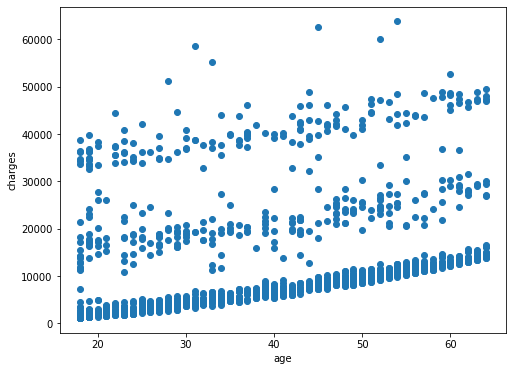

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
x = insurance_prepared['age']
y = insurance_prepared['charges']
ax.scatter(x,y)
ax.set_xlabel('age')
ax.set_ylabel('charges')
plt.show()

In [8]:
mean_charges_age = insurance_prepared.groupby(['age'], as_index = False).mean()
mean_charges_age.head()

age        bmi  children       charges
0   18  31.326159  0.449275   7086.217556
1   19  28.596912  0.426471   9747.909335
2   20  30.632759  0.862069  10159.697736
3   21  28.185714  0.785714   4730.464330
4   22  31.087679  0.714286  10012.932802

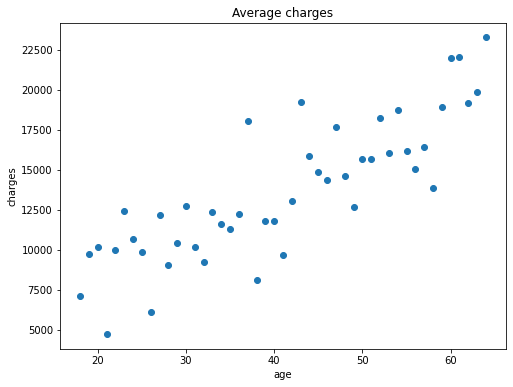

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
x = mean_charges_age['age']
y = mean_charges_age['charges']
ax.scatter(x,y)
ax.set_xlabel('age')
ax.set_ylabel('charges')
ax.set_title('Average charges')
plt.show()

#### Sex

Nie odrzucam płci ze względu na interpretację problemu: jeżeli charges oznacza opłaty poniesione przez daną osobę, to płeć ma znaczenie. Firma ubezpieczeniowa powinna wiedzieć, ile wyda na konkretną osobę. W przypadku składki ubezpieczeniowej można później uśrednić opłatę pomiędzy płciami. 

In [10]:
#rozkład płci w zbiorze:
insurance_prepared['sex'].value_counts(normalize = True)

male      0.505232
female    0.494768
Name: sex, dtype: float64

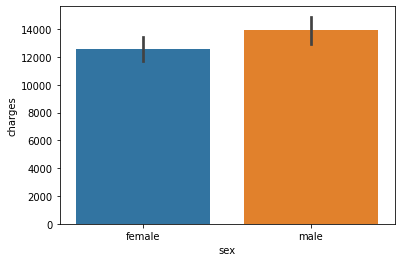

In [11]:
sns.barplot(x = 'sex', y = 'charges', data = insurance_prepared)
plt.show()

In [12]:
sns.barplot(x = 'sex', y = 'charges', hue = 'smoker', data = insurance_prepared)
plt.show()

Poniżej zastosowany zostanie One Hot Encoding (zamiana na wartości binarne) za pomocą 'get_dummies' z biblioteki Pandas.

In [13]:
insurance_prepared = pd.concat([insurance_prepared, pd.get_dummies(insurance_prepared['sex'], drop_first = True)], axis = 1)
insurance_prepared.drop(['sex'], axis = 1, inplace = True)

In [14]:
insurance_prepared.head()

age     bmi  children smoker     region      charges  male
0   19  27.900         0    yes  southwest  16884.92400     0
1   18  33.770         1     no  southeast   1725.55230     1
2   28  33.000         3     no  southeast   4449.46200     1
3   33  22.705         0     no  northwest  21984.47061     1
4   32  28.880         0     no  northwest   3866.85520     1

#### BMI

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
x = insurance['bmi']
y = insurance['charges']
ax.scatter(x,y)
ax.set_xlabel('BMI')
ax.set_ylabel('charges')
ax.scatter(x,y)
plt.show()

#### Children

In [16]:
def groupby_column(dataframe, column):
    groupby = dataframe.groupby(column)
    return {x: groupby.get_group(x) for x in groupby.groups}

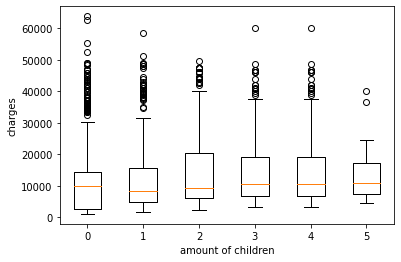

In [17]:
charges_if_children = groupby_column(insurance_prepared, 'children')

fig, ax = plt.subplots()
ax.boxplot([charges_if_children[0]['charges'],
            charges_if_children[1]['charges'],
            charges_if_children[2]['charges'],
            charges_if_children[3]['charges'],
            charges_if_children[3]['charges'],
            charges_if_children[4]['charges']])
ax.set_xticklabels(["0", "1", "2", "3", "4", "5"])
ax.set_xlabel('amount of children')
ax.set_ylabel('charges')
plt.show()

In [18]:
insurance_prepared['children'].value_counts(normalize = True)

0    0.428999
1    0.242152
2    0.179372
3    0.117339
4    0.018685
5    0.013453
Name: children, dtype: float64

In [19]:
insurance_prepared.loc[~insurance_prepared['children'].isin([0,1,2,3]), 'children'] = 'more'
insurance_prepared.head(50)

age     bmi children smoker     region      charges  male
0    19  27.900        0    yes  southwest  16884.92400     0
1    18  33.770        1     no  southeast   1725.55230     1
2    28  33.000        3     no  southeast   4449.46200     1
3    33  22.705        0     no  northwest  21984.47061     1
4    32  28.880        0     no  northwest   3866.85520     1
5    31  25.740        0     no  southeast   3756.62160     0
6    46  33.440        1     no  southeast   8240.58960     0
7    37  27.740        3     no  northwest   7281.50560     0
8    37  29.830        2     no  northeast   6406.41070     1
9    60  25.840        0     no  northwest  28923.13692     0
10   25  26.220        0     no  northeast   2721.32080     1
11   62  26.290        0    yes  southeast  27808.72510     0
12   23  34.400        0     no  southwest   1826.84300     1
13   56  39.820        0     no  southeast  11090.71780     0
14   27  42.130        0    yes  southeast  39611.75770     1
15   19  24.600        1     no  southwest   1837.23700     1
16   52  30.780        1     no  northeast  10797.33620     0
17   23  23.845        0     no  northeast   2395.17155     1
18   56  40.300        0     no  southwest  10602.38500     1
19   30  35.300        0    yes  southwest  36837.46700     1
20   60  36.005        0     no  northeast  13228.84695     0
21   30  32.400        1     no  southwest   4149.73600     0
22   18  34.100        0     no  southeast   1137.01100     1
23   34  31.920        1    yes  northeast  37701.87680     0
24   37  28.025        2     no  northwest   6203.90175     1
25   59  27.720        3     no  southeast  14001.13380     0
26   63  23.085        0     no  northeast  14451.83515     0
27   55  32.775        2     no  northwest  12268.63225     0
28   23  17.385        1     no  northwest   2775.19215     1
29   31  36.300        2    yes  southwest  38711.00000     1
30   22  35.600        0    yes  southwest  35585.57600     1
31   18  26.315        0     no  northeast   2198.18985     0
32   19  28.600     more     no  southwest   4687.79700     0
33   63  28.310        0     no  northwest  13770.09790     1
34   28  36.400        1    yes  southwest  51194.55914     1
35   19  20.425        0     no  northwest   1625.43375     1
36   62  32.965        3     no  northwest  15612.19335     0
37   26  20.800        0     no  southwest   2302.30000     1
38   35  36.670        1    yes  northeast  39774.27630     1
39   60  39.900        0    yes  southwest  48173.36100     1
40   24  26.600        0     no  northeast   3046.06200     0
41   31  36.630        2     no  southeast   4949.75870     0
42   41  21.780        1     no  southeast   6272.47720     1
43   37  30.800        2     no  southeast   6313.75900     0
44   38  37.050        1     no  northeast   6079.67150     1
45   55  37.300        0     no  southwest  20630.28351     1
46   18  38.665        2     no  northeast   3393.35635     0
47   28  34.770        0     no  northwest   3556.92230     0
48   60  24.530        0     no  southeast  12629.89670     0
49   36  35.200        1    yes  southeast  38709.17600     1

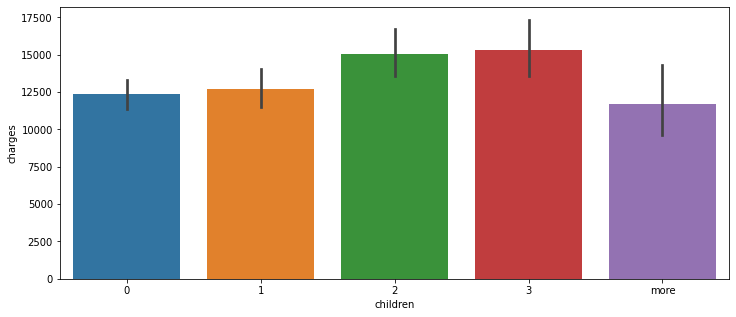

In [20]:
plt.figure(figsize=(12, 5))
sns.barplot(x='children', y='charges', data=insurance_prepared, order = [0, 1, 2, 3, 'more'])
plt.show()

In [21]:
insurance_prepared = pd.concat([insurance_prepared, pd.get_dummies(insurance_prepared['children'], drop_first = True, prefix='child')], axis = 1)
insurance_prepared

age     bmi children smoker     region      charges  male  child_1  \
0      19  27.900        0    yes  southwest  16884.92400     0        0   
1      18  33.770        1     no  southeast   1725.55230     1        1   
2      28  33.000        3     no  southeast   4449.46200     1        0   
3      33  22.705        0     no  northwest  21984.47061     1        0   
4      32  28.880        0     no  northwest   3866.85520     1        0   
...   ...     ...      ...    ...        ...          ...   ...      ...   
1333   50  30.970        3     no  northwest  10600.54830     1        0   
1334   18  31.920        0     no  northeast   2205.98080     0        0   
1335   18  36.850        0     no  southeast   1629.83350     0        0   
1336   21  25.800        0     no  southwest   2007.94500     0        0   
1337   61  29.070        0    yes  northwest  29141.36030     0        0   

      child_2  child_3  child_more  
0           0        0           0  
1           0        0           0  
2           0        1           0  
3           0        0           0  
4           0        0           0  
...       ...      ...         ...  
1333        0        1           0  
1334        0        0           0  
1335        0        0           0  
1336        0        0           0  
1337        0        0           0  

[1338 rows x 11 columns]

In [22]:
insurance_prepared.drop(['children'], axis = 1, inplace = True)
insurance_prepared

age     bmi smoker     region      charges  male  child_1  child_2  \
0      19  27.900    yes  southwest  16884.92400     0        0        0   
1      18  33.770     no  southeast   1725.55230     1        1        0   
2      28  33.000     no  southeast   4449.46200     1        0        0   
3      33  22.705     no  northwest  21984.47061     1        0        0   
4      32  28.880     no  northwest   3866.85520     1        0        0   
...   ...     ...    ...        ...          ...   ...      ...      ...   
1333   50  30.970     no  northwest  10600.54830     1        0        0   
1334   18  31.920     no  northeast   2205.98080     0        0        0   
1335   18  36.850     no  southeast   1629.83350     0        0        0   
1336   21  25.800     no  southwest   2007.94500     0        0        0   
1337   61  29.070    yes  northwest  29141.36030     0        0        0   

      child_3  child_more  
0           0           0  
1           0           0  
2           1           0  
3           0           0  
4           0           0  
...       ...         ...  
1333        1           0  
1334        0           0  
1335        0           0  
1336        0           0  
1337        0           0  

[1338 rows x 10 columns]

#### Smoker

Poniżej średnie koszty leczenia zostaną pogrupowane według tego, czy ktoś pali, czy nie. 

In [23]:
charges_if_smoker = groupby_column(insurance_prepared, 'smoker')

fig, ax = plt.subplots()
ax.bar('Smoker', charges_if_smoker['yes']['charges'].mean())
ax.bar('No smoker', charges_if_smoker['no']['charges'].mean())
ax.set_ylabel('Charges')
plt.show()

Na powyższym histogramie wyraźnie widać, że koszty leczenia ponoszone przez palaczy są ponad trzy razy wyższe niż koszty leczenia osób, które nie palą papierosów. 

In [24]:
insurance_prepared = pd.concat([insurance_prepared, pd.get_dummies(insurance_prepared['smoker'], drop_first = True, prefix='smoker')], axis = 1)


In [25]:
insurance_prepared.drop(['smoker'], axis = 1, inplace = True)

#### Region

In [26]:
sns.barplot(x = 'region', y = 'charges', data = insurance)
plt.show()

Powyższy wykres pokazuje średnie koszty leczenia w poszczególnych regionach. Najniższe obserujemy w Northwest i Southwest, nieco wyższe w Northeast a najwyższe w Southeast. Być może wyższe koszty w poszczególnych regionach są skorelowane z ilością palaczy w danym regionie. Poniżej sprawdzenie hipotezy.

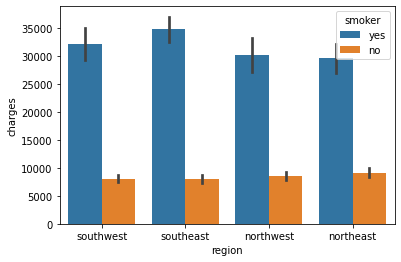

In [27]:
sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = insurance)
plt.show()

In [28]:
insurance.groupby(['region', 'smoker']).mean()

age        bmi  children       charges
region    smoker                                              
northeast no      39.536965  29.332082  1.046693   9165.531672
          yes     38.238806  28.565224  1.044776  29673.536473
northwest no      39.168539  29.212678  1.119850   8556.463715
          yes     39.327586  29.140431  1.275862  30192.003182
southeast no      38.673993  33.442418  1.065934   8032.216309
          yes     39.736264  33.096703  1.000000  34844.996824
southwest no      40.183521  30.507865  1.127341   8019.284513
          yes     36.103448  31.005172  1.206897  32269.063494

Z powyższej analizy wynika, że koszty leczenia w poszczególnych regionach są zależne od liczby osób palących wśród obserwacji dla danego regionu. W Southwest liczba palaczy jest największa spośród wszystkich regionów. Analogicznie jest w przypadku BMI, najwyższe średnie BMI występuje własnie w Southeast. Dlatego wydaje się, że region sam w sobie nie ma wpływu na koszty leczenia, a przyczynia się do ich wzrotu palenie i nadwaga/otyłość (wysoka wartość wskaźnika BMI).

In [29]:
insurance_prepared.drop(['region'], axis = 1, inplace = True)

In [30]:
insurance_prepared.head()

age     bmi      charges  male  child_1  child_2  child_3  child_more  \
0   19  27.900  16884.92400     0        0        0        0           0   
1   18  33.770   1725.55230     1        1        0        0           0   
2   28  33.000   4449.46200     1        0        0        1           0   
3   33  22.705  21984.47061     1        0        0        0           0   
4   32  28.880   3866.85520     1        0        0        0           0   

   smoker_yes  
0           1  
1           0  
2           0  
3           0  
4           0

### Standaryzacja

Do skalowania danych wybrano standaryzację, ponieważ jest ona mniej wrażliwa od normalizacji na wartości odstające, a tych jest całkiem sporo w naszym zbiorze danych. Wcześniej nie usunięto szumów, ponieważ było ich stosunkowo dużo jak na tę ilość obserwacji, usunięcie ich mogłoby spowodować przekłamanie modelu. 

In [31]:
data_prepared = insurance_prepared.copy()

In [32]:
data_prepared['age_std'] = (data_prepared['age'] - data_prepared['age'].mean()) / data_prepared['age'].std()
data_prepared

age     bmi      charges  male  child_1  child_2  child_3  child_more  \
0      19  27.900  16884.92400     0        0        0        0           0   
1      18  33.770   1725.55230     1        1        0        0           0   
2      28  33.000   4449.46200     1        0        0        1           0   
3      33  22.705  21984.47061     1        0        0        0           0   
4      32  28.880   3866.85520     1        0        0        0           0   
...   ...     ...          ...   ...      ...      ...      ...         ...   
1333   50  30.970  10600.54830     1        0        0        1           0   
1334   18  31.920   2205.98080     0        0        0        0           0   
1335   18  36.850   1629.83350     0        0        0        0           0   
1336   21  25.800   2007.94500     0        0        0        0           0   
1337   61  29.070  29141.36030     0        0        0        0           0   

      smoker_yes   age_std  
0              1 -1.438227  
1              0 -1.509401  
2              0 -0.797655  
3              0 -0.441782  
4              0 -0.512957  
...          ...       ...  
1333           0  0.768185  
1334           0 -1.509401  
1335           0 -1.509401  
1336           0 -1.295877  
1337           1  1.551106  

[1338 rows x 10 columns]

In [33]:
data_prepared['bmi_std'] = (data_prepared['bmi'] - data_prepared['bmi'].mean()) / data_prepared['bmi'].std()

In [34]:
data_prepared

age     bmi      charges  male  child_1  child_2  child_3  child_more  \
0      19  27.900  16884.92400     0        0        0        0           0   
1      18  33.770   1725.55230     1        1        0        0           0   
2      28  33.000   4449.46200     1        0        0        1           0   
3      33  22.705  21984.47061     1        0        0        0           0   
4      32  28.880   3866.85520     1        0        0        0           0   
...   ...     ...          ...   ...      ...      ...      ...         ...   
1333   50  30.970  10600.54830     1        0        0        1           0   
1334   18  31.920   2205.98080     0        0        0        0           0   
1335   18  36.850   1629.83350     0        0        0        0           0   
1336   21  25.800   2007.94500     0        0        0        0           0   
1337   61  29.070  29141.36030     0        0        0        0           0   

      smoker_yes   age_std   bmi_std  
0              1 -1.438227 -0.453151  
1              0 -1.509401  0.509431  
2              0 -0.797655  0.383164  
3              0 -0.441782 -1.305043  
4              0 -0.512957 -0.292447  
...          ...       ...       ...  
1333           0  0.768185  0.050278  
1334           0 -1.509401  0.206062  
1335           0 -1.509401  1.014499  
1336           0 -1.295877 -0.797515  
1337           1  1.551106 -0.261290  

[1338 rows x 11 columns]

In [35]:
finish_data = data_prepared.copy()
finish_data.drop(['age', 'bmi'], axis = 1, inplace = True)
finish_data

charges  male  child_1  child_2  child_3  child_more  smoker_yes  \
0     16884.92400     0        0        0        0           0           1   
1      1725.55230     1        1        0        0           0           0   
2      4449.46200     1        0        0        1           0           0   
3     21984.47061     1        0        0        0           0           0   
4      3866.85520     1        0        0        0           0           0   
...           ...   ...      ...      ...      ...         ...         ...   
1333  10600.54830     1        0        0        1           0           0   
1334   2205.98080     0        0        0        0           0           0   
1335   1629.83350     0        0        0        0           0           0   
1336   2007.94500     0        0        0        0           0           0   
1337  29141.36030     0        0        0        0           0           1   

       age_std   bmi_std  
0    -1.438227 -0.453151  
1    -1.509401  0.509431  
2    -0.797655  0.383164  
3    -0.441782 -1.305043  
4    -0.512957 -0.292447  
...        ...       ...  
1333  0.768185  0.050278  
1334 -1.509401  0.206062  
1335 -1.509401  1.014499  
1336 -1.295877 -0.797515  
1337  1.551106 -0.261290  

[1338 rows x 9 columns]

In [36]:
features = ['age_std', 'bmi_std', 'male', 'child_1', 'child_2', 'child_3', 'child_more', 'smoker_yes']

target = 'charges'

## Regresja liniowa wielu zmiennych

In [37]:
X = finish_data[features] #jeden nawias kwadratowy, bo features są już listą
y = finish_data[target]

In [38]:
lr_model = LinearRegression() #inicjalizacja modelu
lr_model.fit(X,y) #trenowanie modelu

LinearRegression()

Sprawdzenie wytrenowanych parametrów modelu:
- intercept_ ➝ **theta_0**
- coef_ ➝ **theta_1** oraz kolejne (jeśli zmiennych objaśniających jest więcej)

In [39]:
lr_model.intercept_

7890.071824115919

In [40]:
lr_model.coef_

array([ 3627.98916266,  1957.67036682,  -125.24001798,   370.74331964,
        1626.26492445,   997.07528071,  2121.19674023, 23815.30819676])

## Ocena modelu
Wyodrębnienie z naszego zbioru zbiorów treningowego i testowego

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)
#random_state - podział jest losowy, jednak wybierając tą samą liczbę uzyskamy tą samą losowość

Następnnie przeprowadzamy walidację krzyżową

In [42]:
#cv - cross validation
cv = KFold(n_splits=10, #dane dzielimy na 10 podzbiorów, najczęściej dzielimy na 3, 5 lub 10 (wybór przyjdzie z doświadczeniem)
           shuffle=True, #tasowanie danych
           random_state=2022
          )

Uczenie modelu:

In [43]:
lr_model = LinearRegression() #inicjalizacja modelu
lr_model.fit(X_train, y_train) #trenowanie modelu

LinearRegression()

Predykcje dla zbioru treningowego i testowego: 

In [44]:
y_predict_train = lr_model.predict(X_train)
y_predict_test = lr_model.predict(X_test)

Współczynnik determinacji R^2:

In [45]:
print(f'RL Model Train R^2: {r2_score(y_train, y_predict_train)}')

RL Model Train R^2: 0.737646193286086


Nasz model wyjaśnia około 73,7% zmienności zmiennej y, czyli w istocie można przewidywać koszty leczenia na podstawie danych cech.

In [46]:
mse = mean_squared_error(y_test, y_predict_test)
print(f'RL Model MSE: {mse}')

RL Model MSE: 28639949.588827744


In [47]:
print(f'RL Model RMSE: {sqrt(mse)}')

RL Model RMSE: 5351.630554216887


Zgodnie z RMSE model myli się w przewidywaniu kosztów leczenia o 5351 dolarów. 